# EXPLAINABLE AI
1. ### Case study on Real-world Use Cases where ML model went badly wrong. ### 
2. ### Perform Exploratory data analysis on structured, unstructured and image text data  
3. ### Explore result  visualization of post-hoc analysis methods:-  
    1. #### Partial dependence plot(PDP) 
    2. #### CNN:- layer-wise relevance propagation (LRP)( Guided backprop, Gradient CAM) Surrogate explainer 
4. ### Explore result  visualization of post-hoc analysis methods:-  
    1. #### Feature importance -sensitivity analysis 
    2. #### Counter factual examples 
5. ### Implementing Data Centric XAI approach 
6. ### Investigate the interpretability of LIME local explanation on tabular, image and text data 
7. ### Explore different types of SHAP on ML and DL  models  to explore local and global explanations  
8. ### Demonstrate the working of transformers using SHAP 
9. ### Exploring human friendly explanation with TCAV 
10. ### Exploring  popular XAI frameworks   

## 1. Case study on Real-world Use Cases where ML model went badly wrong.


## 2. Perform Exploratory data analysis on structured, unstructured and image text data

### 1. Download the diabaties.csv from GCR (do preprocessing):
1. Visualize the data distribution using bar chart.
2. Calculate mean, std, variance for all the attributes present in dataset.
3. Identify the Highly correlated attributes from dataset using chi2 test or T test.
4. Draw the heatmap for those highly correlated attributes.
5. Identify the minimum and maximum length of attribute using following formula.
    - min_limit = mean(x)+std(x)*sqrt(x)
    - max_limit = mean(x)-std(x)*sqrt(x)
7. Find the outliers based on min limit and max limit.
8. And visualize the outliers using any chart.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
# Load dataset
df = pd.read_csv("diabetes.csv")  # Replace with your filename
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


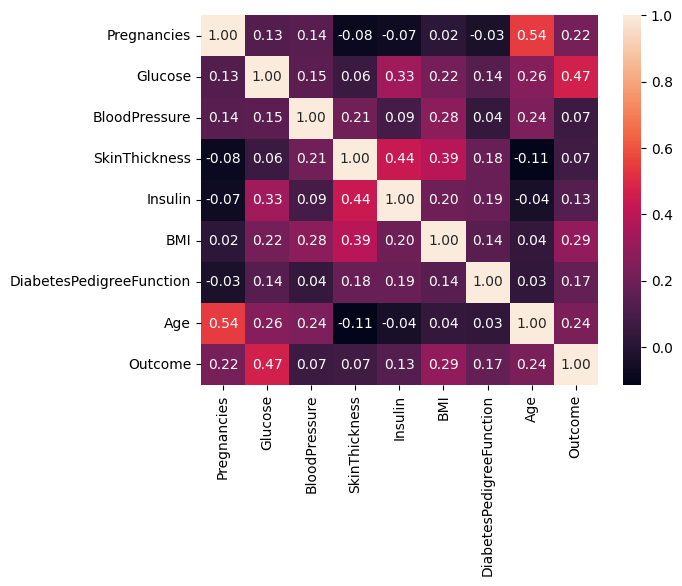

In [5]:
# plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [6]:
# Stats: mean, std, variance
stats = df.describe().T[['mean', 'std']]
stats['variance'] = df.var()
print(stats)

                                mean         std      variance
Pregnancies                 3.845052    3.369578     11.354056
Glucose                   120.894531   31.972618   1022.248314
BloodPressure              69.105469   19.355807    374.647271
SkinThickness              20.536458   15.952218    254.473245
Insulin                    79.799479  115.244002  13281.180078
BMI                        31.992578    7.884160     62.159984
DiabetesPedigreeFunction    0.471876    0.331329      0.109779
Age                        33.240885   11.760232    138.303046
Outcome                     0.348958    0.476951      0.227483


In [7]:
# Encode categorical columns for chi2
label_df = df.copy()
for col in label_df.select_dtypes(include='object').columns:
    label_df[col] = LabelEncoder().fit_transform(label_df[col])

In [8]:
# Normalize data for chi2
X = MinMaxScaler().fit_transform(label_df.dropna())

# Chi-squared test (top correlated with first column)
chi_vals, _ = chi2(X, label_df.iloc[:, 0])
chi_df = pd.Series(chi_vals, index=label_df.columns).sort_values(ascending=False)
top_corr = chi_df[1:6].index.tolist()  # top 5 excluding target

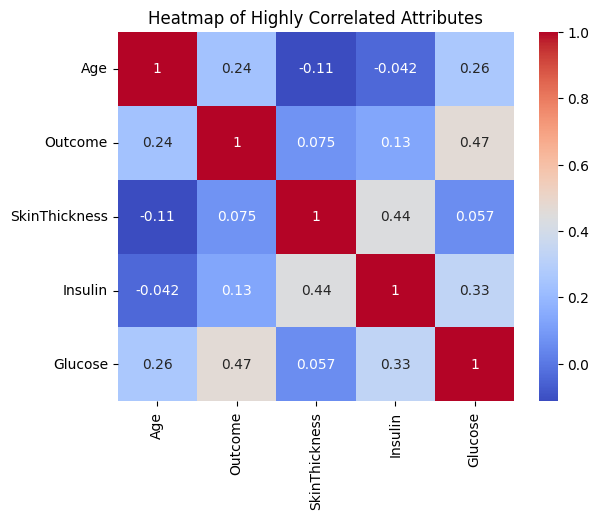

In [9]:
# Heatmap of highly correlated
sns.heatmap(label_df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Highly Correlated Attributes")
plt.show()

In [10]:
# Min & max limits using given formula
for j in df.select_dtypes(include='number').columns:
    x = df[j]
    min_lim=np.mean(df[j])-np.std(df[j])*np.sqrt(df[j].abs().mean())
    max_lim=np.mean(df[j])+np.std(df[j])*np.sqrt(df[j].abs().mean())
    outliers = (x < max_lim) | (x > min_lim)
    print(f'For {j}: \n\tOutliers {"Exist" if all(outliers) else "Not Exist"}\n\tMAX:{round(max_lim,4)}\n\t\tMIN:{round(min_lim,4)}')
    print("-------------------------------")

For Pregnancies: 
	Outliers Exist
	MAX:10.4481
		MIN:-2.758
-------------------------------
For Glucose: 
	Outliers Exist
	MAX:472.2111
		MIN:-230.422
-------------------------------
For BloodPressure: 
	Outliers Exist
	MAX:229.9049
		MIN:-91.694
-------------------------------
For SkinThickness: 
	Outliers Exist
	MAX:92.7803
		MIN:-51.7074
-------------------------------
For Insulin: 
	Outliers Exist
	MAX:1108.6101
		MIN:-949.0111
-------------------------------
For BMI: 
	Outliers Exist
	MAX:76.5579
		MIN:-12.5728
-------------------------------
For DiabetesPedigreeFunction: 
	Outliers Exist
	MAX:0.6993
		MIN:0.2444
-------------------------------
For Age: 
	Outliers Exist
	MAX:101.0002
		MIN:-34.5185
-------------------------------
For Outcome: 
	Outliers Exist
	MAX:0.6305
		MIN:0.0674
-------------------------------


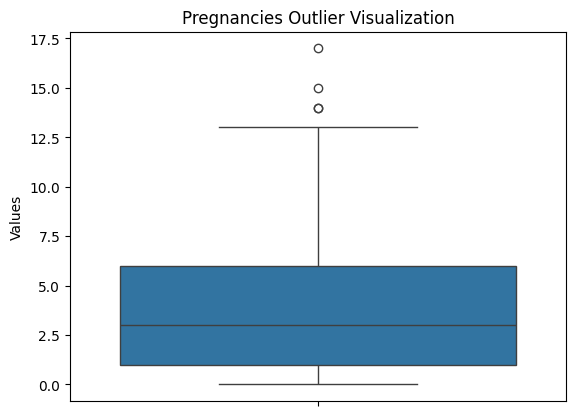

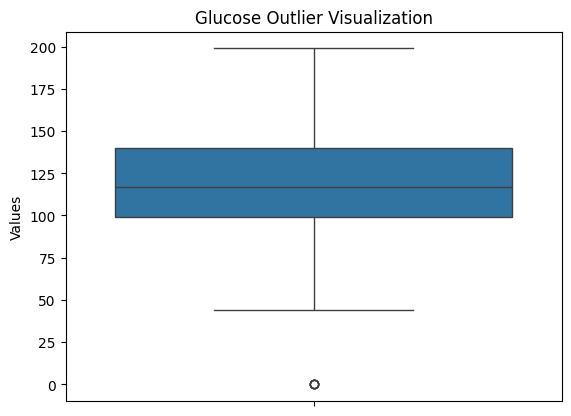

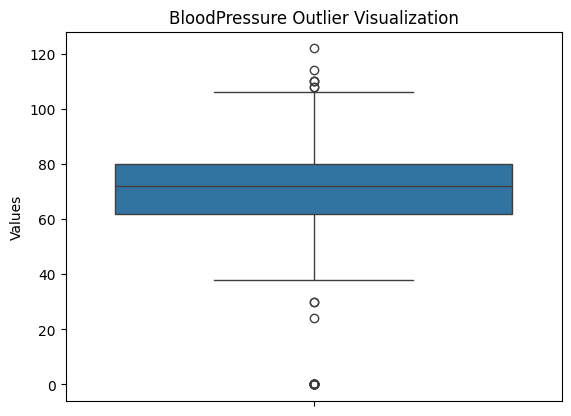

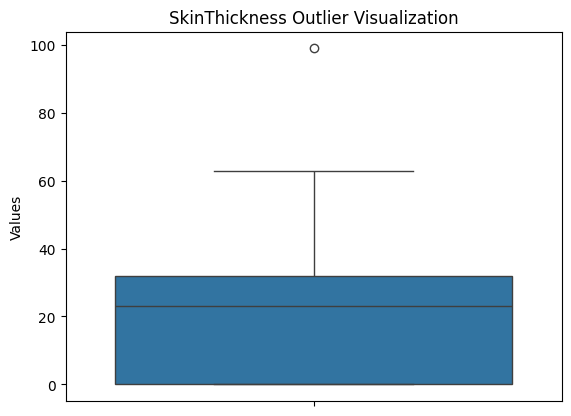

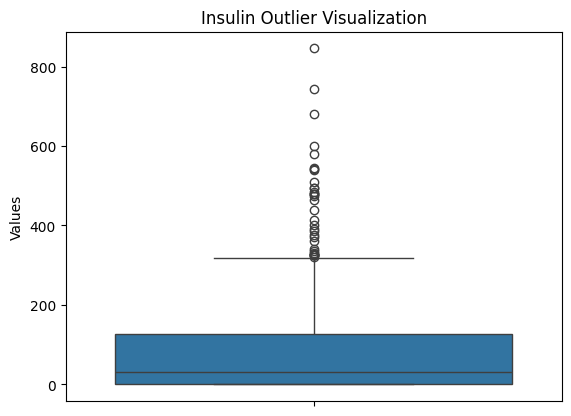

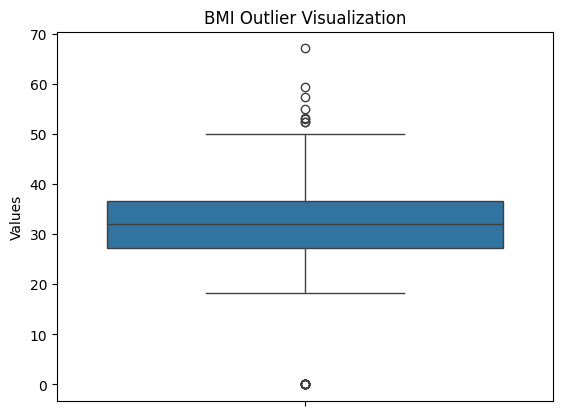

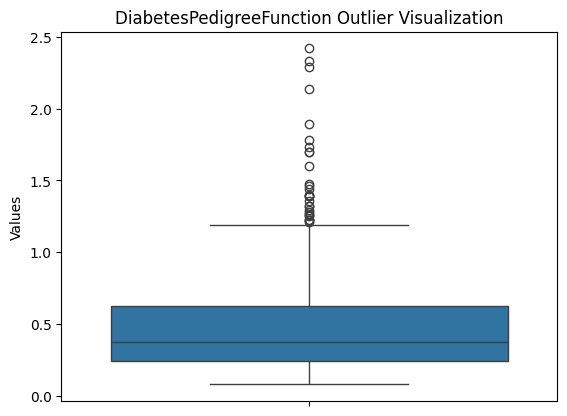

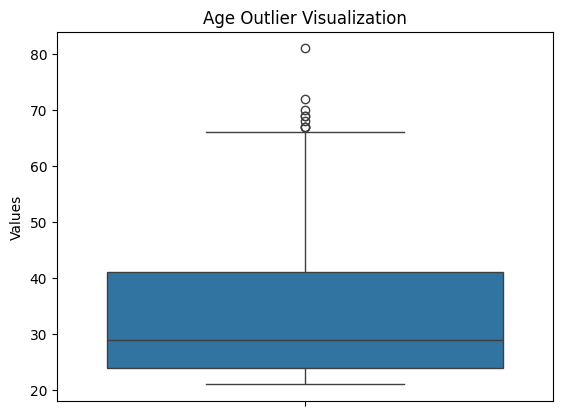

In [11]:
for f in df.drop(['Outcome'], axis='columns'):
    sns.boxplot(df[f])
    plt.title(f"{f} Outlier Visualization")
    plt.xticks(rotation=90)
    plt.ylabel("Values")
    plt.show()

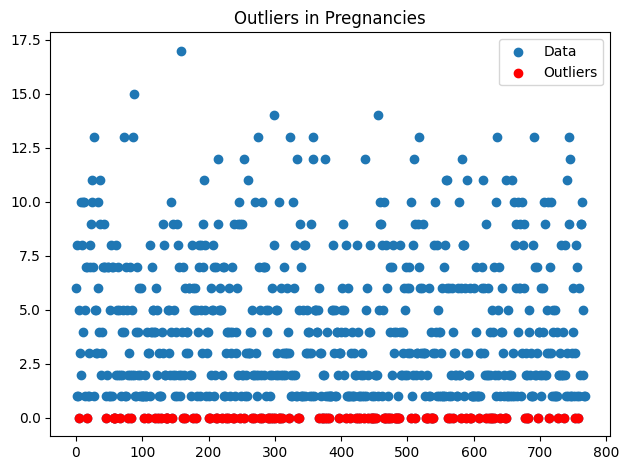

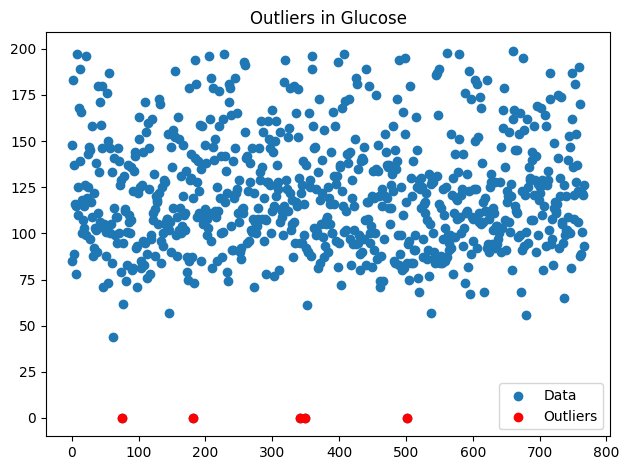

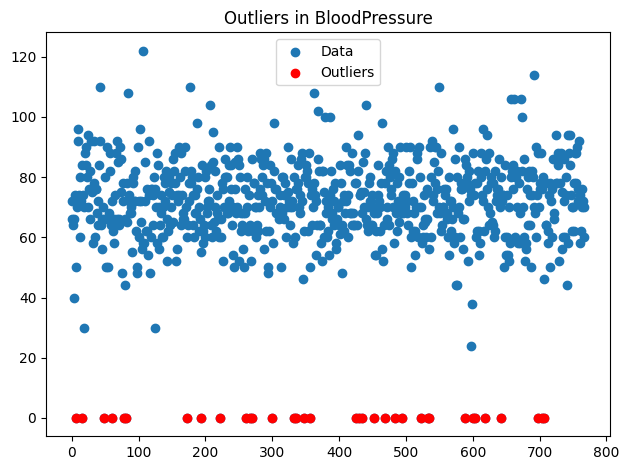

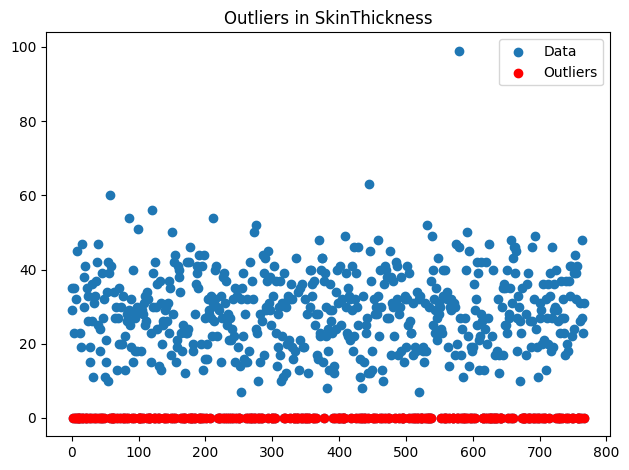

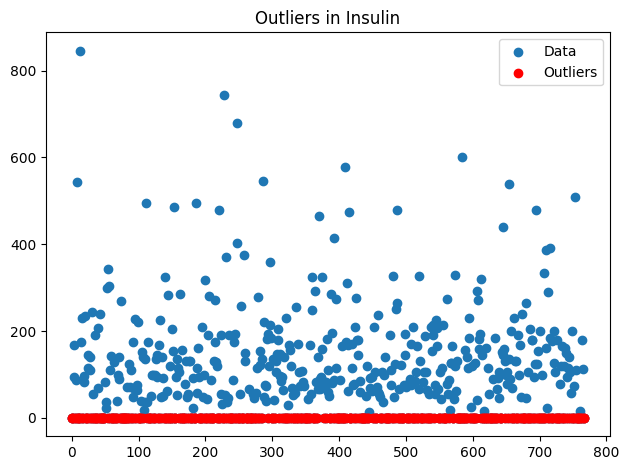

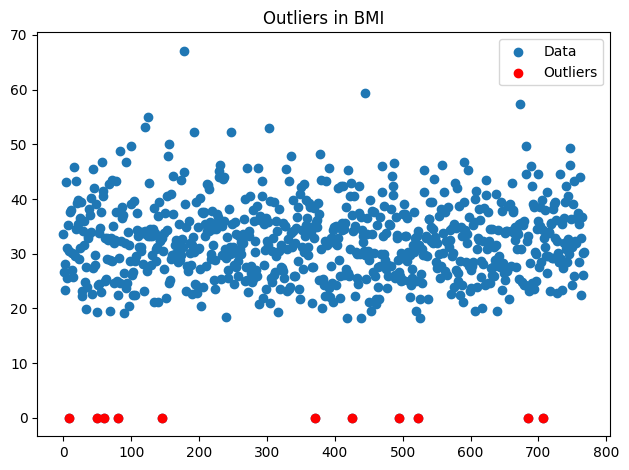

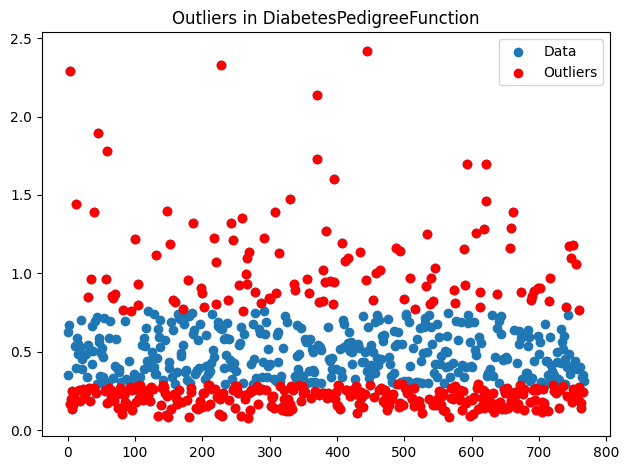

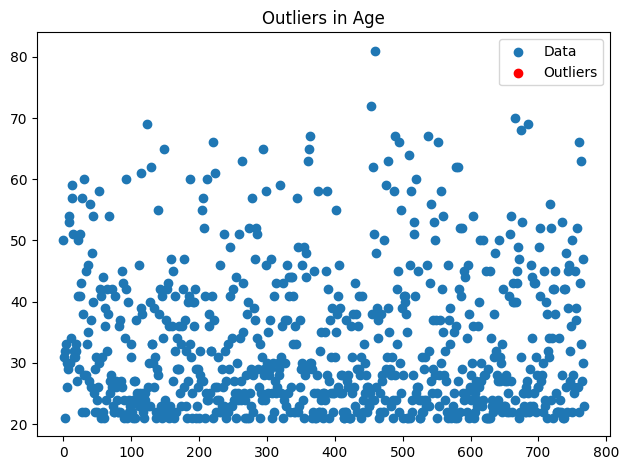

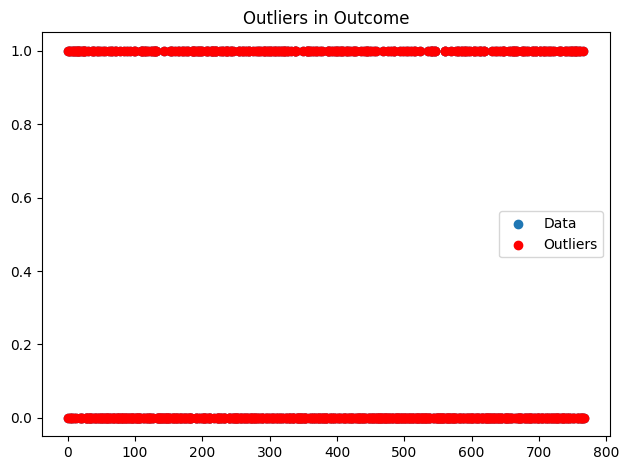

In [12]:
for col in df.select_dtypes(include='number').columns:
    x = df[col]
    min_lim = x.mean() + x.std() * np.sqrt(x)
    max_lim = x.mean() - x.std() * np.sqrt(x)
    outliers = (x < max_lim) | (x > min_lim)
    
    # Outlier visualization
    plt.figure()
    plt.scatter(df.index, x, label='Data')
    plt.scatter(df.index[outliers], x[outliers], color='red', label='Outliers')
    plt.title(f"Outliers in {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()


### 2. Load Image Data given in GCR,(unstructured data)
1. Draw bar chart for visualizing the size of data based on training and testing
2. Define 2 models such as (Sequential Layers)
    - simple 3 layers Neural Network and 
    - design a efficient Neural Network min of 10 Layers(max epoch :50)
3. Find any overfitting or underfitting in existing 2 models
4. Visualize any normalized image and prediction result given by any one of the model
5. Visualize the 3 layers output feature using t-sne plot

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np, os

In [41]:
# Load Image Data
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 52s 0us/step


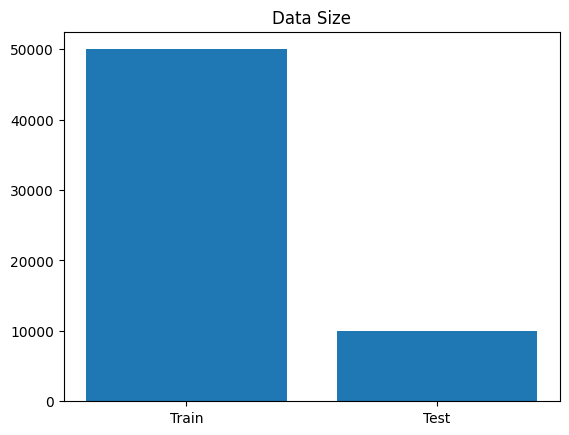

In [42]:
# Visualize data size
plt.bar(['Train', 'Test'], [len(x_train), len(x_test)]); plt.title("Data Size"); plt.show()

In [44]:
# Simple 3-layer model
model1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    layers.Flatten(), layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'), layers.Dense(len(class_names))
])

# Deep 10-layer model
model2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(32,32,3)),
    layers.Conv2D(32, 3, activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), 
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(), layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'), 
    layers.Dense(len(class_names))
])

In [45]:
# Compile both
for m in [model1, model2]:
    m.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [48]:
h1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2)
h2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/2
1563/1563 [==============================] - 20s 12ms/step - loss: 1.8932 - accuracy: 0.3124 - val_loss: 1.8674 - val_accuracy: 0.3205
Epoch 2/2
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8382 - accuracy: 0.3344 - val_loss: 1.8300 - val_accuracy: 0.3381
Epoch 1/3
1563/1563 [==============================] - 180s 112ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/3
1563/1563 [==============================] - 161s 103ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/3
1563/1563 [==============================] - 150s 96ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.1000


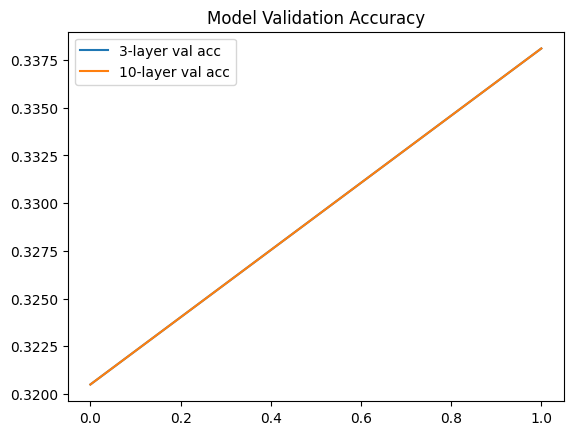

In [49]:
# Overfitting/Underfitting detection (plot accuracy)
plt.plot(h1.history['val_accuracy'], label='3-layer val acc')
plt.plot(h1.history['val_accuracy'], label='10-layer val acc')
plt.legend(); 
plt.title("Model Validation Accuracy"); 
plt.show()

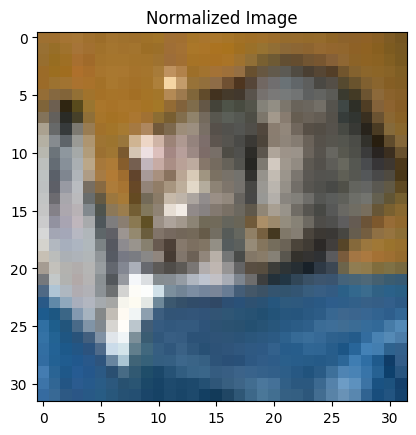

1/1 [==============================] - 0s 231ms/step
Predicted: airplane | Actual: cat


C:\Users\saiha\AppData\Local\Temp\ipykernel_15104\26624656.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted:", class_names[int(pred)], "| Actual:", class_names[int(y_test[i])])


In [52]:
i = 0
plt.imshow(x_test[i]); 
plt.title("Normalized Image"); 
plt.show()
pred = tf.argmax(model2.predict(x_test[i:i+1]), axis=1)
print("Predicted:", class_names[int(pred)], "| Actual:", class_names[int(y_test[i])])

32/32 [==============================] - 1s 8ms/step


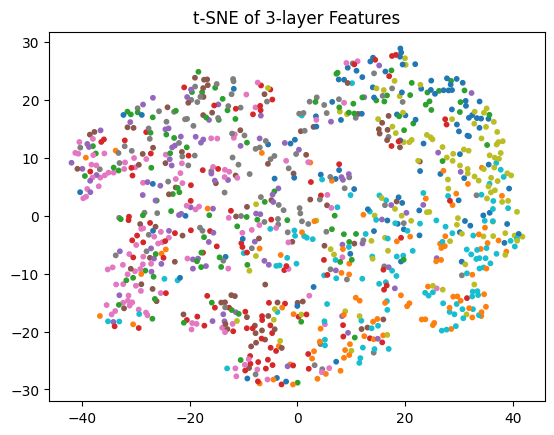

In [53]:
# t-SNE on 3-layer NN features
extract = tf.keras.Model(inputs=model1.input, outputs=model1.layers[-2].output)
features = extract.predict(x_test[:1000])
tsne = TSNE(n_components=2).fit_transform(features)
plt.scatter(tsne[:,0], tsne[:,1], c=y_test[:1000].flatten(), cmap='tab10', s=10)
plt.title("t-SNE of 3-layer Features"); 
plt.show()

### 3. EDA On Text Data
1. Download any text classification dataset(sentiment analysis, document classification or opinion minded)
2. Do necessary preprocessing such as
   1. Tokenization
   2. Stemming
   3. Lemmatization
   4. Punctuation removal
   5. Stop word removal
3. Visualise the class distribution using pie chart
4. Visualize the data before preprocessing and after preprocessing using word cloud
5. Draw the word frequency
6. Apply simple SVM Classifier Algorithm on the dataset and find the accuracy of model
7. Draw confusion matrix and roc-auc curve

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from collections import Counter
# nltk.download('all')

In [64]:
from nltk import PorterStemmer,WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [65]:
data = pd.read_csv('test.csv')
data.head()

,text,label
0,Fears for T N pension after talks Unions repre...,2
1,The Race is On: Second Private Team Sets Launc...,3
2,Ky. Company Wins Grant to Study Peptides (AP) ...,3
3,Prediction Unit Helps Forecast Wildfires (AP) ...,3
4,Calif. Aims to Limit Farm-Related Smog (AP) AP...,3


In [66]:
def any(x):
    di={1:"World",2:"Sports" ,3:"Business" ,4:"Sci/Tech"}
    return di[x+1]
data['labela']=data['label'].apply(any)

In [67]:
data['labela'].value_counts()

Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: labela, dtype: int64

In [68]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocessing(x):
    x1=re.sub(r'[^\w\s]', '', x)
    y=word_tokenize(x1)
    y1=[porter.stem(i) for i in y]
    y2=[lemmatizer.lemmatize(j) for j in y1]
    y3=[w for w in y2 if not w.lower() in stop_words]
    return ' '.join(y3)

In [69]:
data['CleanedText']=data['text'].apply(preprocessing)

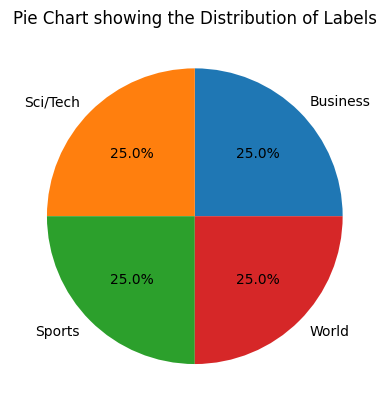

In [70]:
plt.pie(data['labela'].value_counts(), labels=data['labela'].unique().tolist(), autopct='%1.1f%%')
plt.title("Pie Chart showing the Distribution of Labels")
plt.show()

In [71]:
corpus = []
for i in data['CleanedText']:
    k=word_tokenize(i)
    corpus.extend([j for j in k])

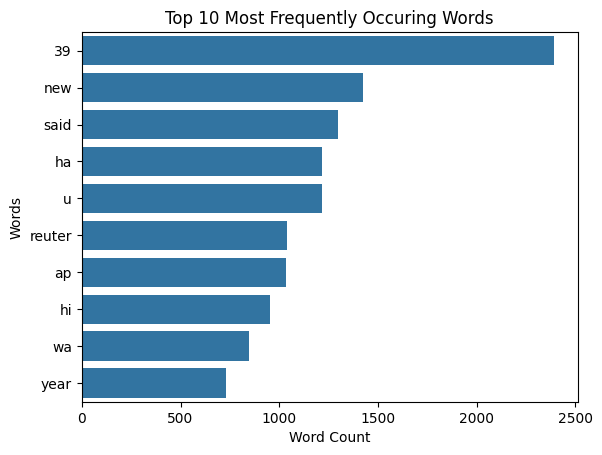

In [72]:
mostCommon = Counter(corpus).most_common(10)
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.xlabel("Word Count")
plt.ylabel("Words")
plt.show()

**SVM**

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(data['CleanedText'],data['label'],random_state=104,test_size=0.25,shuffle=True) 
X_train =tfidf_vectorizer.fit_transform(X_train)
X_test =tfidf_vectorizer.fit_transform(X_test)

In [74]:
from sklearn.svm import SVC

svm = SVC(kernel="linear",probability=True)
# Trained the model
svm.fit(X_train, y_train)
predictions = svm.predict(X_train)
# Evaluate the predictions
accuracy = svm.score(X_train, y_train)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.9729824561403508


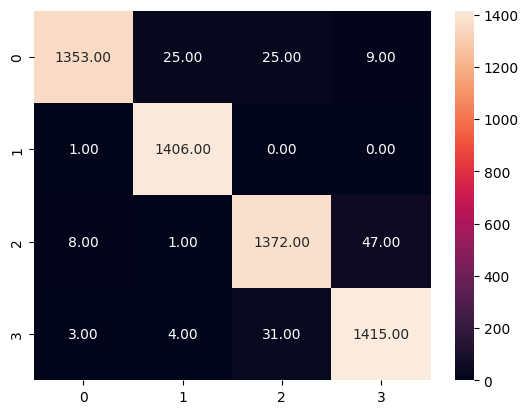

In [78]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay,confusion_matrix
confusion_matrix =confusion_matrix(y_train, predictions)

sns.heatmap(confusion_matrix,annot=True,fmt=".2f")
plt.show()

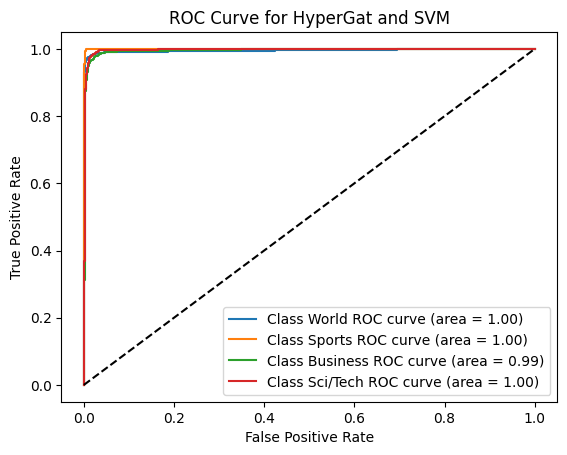

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize



y_test_binarized = label_binarize(y_train, classes=np.unique(y_train))
labels = ["World", "Sports", "Business", "Sci/Tech"]
# Plot ROC curve for each class
for i in range(y_test_binarized.shape[1]):
    y_scores = svm.predict_proba(X_train)[:, i]
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {labels[i]} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for HyperGat and SVM')
plt.legend()
plt.show()

## 3. Explore result  visualization of post-hoc analysis methods:-  
####          a. Partial dependence plot(PDP) 
####          b. CNN:- layer-wise relevance propagation (LRP)( Guided backprop, Gradient CAM) Surrogate explainer 

## 4. Explore result  visualization of post-hoc analysis methods:-  
#### a. Feature importance -sensitivity analysis 
#### b. Counter factual examples

## 5. Implementing Data Centric XAI approach 

## 6. Investigate the interpretability of LIME local explanation on tabular, image and text data 

## 7. Explore different types of SHAP on ML and DL  models  to explore local and global explanations  

## 8. Demonstrate the working of transformers using SHAP

## 9. Exploring human friendly explanation with TCAV 